Evaluation Report - Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      6858
         1.0       0.71      0.65      0.68      3142

    accuracy                           0.81     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.80      0.81      0.80     10000

AUC-ROC: 0.8876


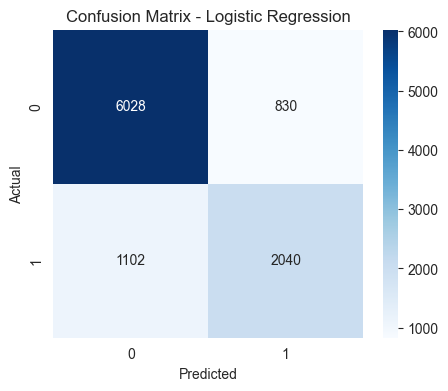

Evaluation Report - Random Forest:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6858
         1.0       0.98      0.98      0.98      3142

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

AUC-ROC: 0.9889


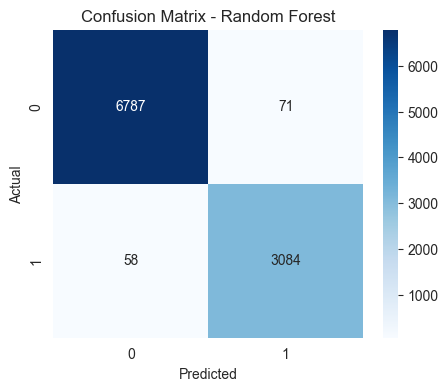

Random Forest model saved: ../src/models\rf_model.pkl


In [3]:
# notebooks/03_modeling.ipynb

# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

# -------------------------------
# 2. Load Processed Dataset
# -------------------------------
DATA_PATH = "../data/fraud_dataset_processed.csv"
df = pd.read_csv(DATA_PATH)

# -------------------------------
# 3. Split features and target
# -------------------------------
X = df.drop("Fraud_Label", axis=1)
y = df["Fraud_Label"]

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 5. Initial Modeling
# -------------------------------

# 5.1 Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# 5.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# -------------------------------
# 6. Model Evaluation
# -------------------------------
def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    print(f"Evaluation Report - {model_name}:\n")
    print(classification_report(y_true, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

# -------------------------------
# 7. Save Selected Model
# -------------------------------
import os
import joblib

MODEL_DIR = "../src/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save Random Forest
rf_model_path = os.path.join(MODEL_DIR, "rf_model.pkl")
joblib.dump(rf_model, rf_model_path)
print(f"Random Forest model saved: {rf_model_path}")

